In [ ]:
import numpy as np

# Matrix for different values of g in [-1, 1]
g_values = np.linspace(-1, 1, 100)
eigenvalues = []

for g in g_values:
    # Define a 6x6 matrix
    H = np.zeros((6, 6))

    # Diagonal elements from the single particle term
    H[0, 0] = 2 * 1 + 2 * 2  # |(12)(12)>
    H[1, 1] = 2 * 1 + 2 * 3  # |(13)(13)>
    H[2, 2] = 2 * 1 + 2 * 4  # |(14)(14)>
    H[3, 3] = 2 * 2 + 2 * 3  # |(23)(23)>
    H[4, 4] = 2 * 2 + 2 * 4  # |(24)(24)>
    H[5, 5] = 2 * 3 + 2 * 4  # |(34)(34)>

    # Non-diagonal elements from pairing term (off-diagonal coupling)
    interaction_energy = -0.5 * g  # generic term for simplification
    H[0, 1] = interaction_energy  # Interaction between |(12)(12)> and |(13)(13)>
    H[0, 2] = interaction_energy
    H[0, 3] = interaction_energy
    H[0, 4] = interaction_energy
    H[0, 5] = interaction_energy

    H[1, 2] = interaction_energy
    H[1, 3] = interaction_energy
    H[1, 4] = interaction_energy
    H[1, 5] = interaction_energy

    H[2, 3] = interaction_energy
    H[2, 4] = interaction_energy
    H[2, 5] = interaction_energy

    H[3, 4] = interaction_energy
    H[3, 5] = interaction_energy

    H[4, 5] = interaction_energy

    # Symmetric matrix
    H = H + H.T - np.diag(H.diagonal())

    # Diagonalize the Hamiltonian matrix
    eigvals, _ = np.linalg.eigh(H)
    eigenvalues.append(eigvals)

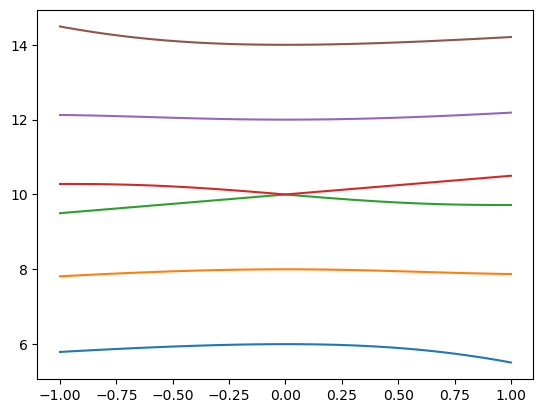

In [6]:
eigenvalues = np.array(eigenvalues)

plt.plot(g_values, eigenvalues)

In [ ]:
# Plot relationship between g and eigvals[0] ground state energy
import matplotlib.pyplot as plt

plt.plot(g_values, [eigs[0] for eigs in eigenvalues], label="Ground State Energy")
plt.xlabel("g")
plt.ylabel("Energy")
plt.legend()
plt.show()

In [2]:
print(H)

[[ 6.  -0.5 -0.5 -0.5 -0.5 -0.5]
 [-0.5  8.  -0.5 -0.5 -0.5 -0.5]
 [-0.5 -0.5 10.  -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 10.  -0.5 -0.5]
 [-0.5 -0.5 -0.5 -0.5 12.  -0.5]
 [-0.5 -0.5 -0.5 -0.5 -0.5 14. ]]


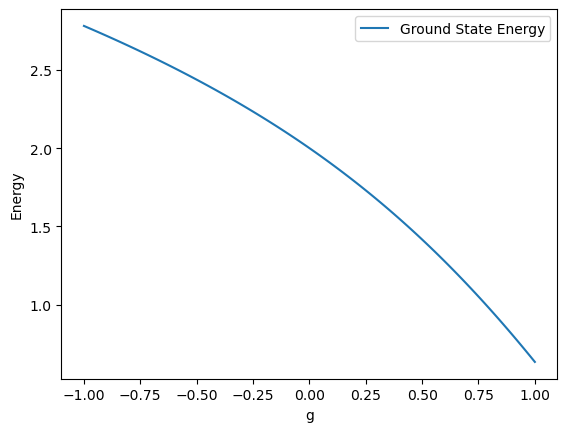

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define basis states |(p1, p1)(p2, p2)| where p1 < p2
basis_states = [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]


# Calculate the single-particle energy contributions for all basis states
def single_particle_energy(state):
    return 2 * (state[0] - 1) + 2 * (state[1] - 1)


# Calculate the pairing energy contributions for all basis states
def pairing_energy(state, g):
    # One contribution for each pair (p1,p2) in the state
    return -0.5 * g


# Range of g values to test
g_values = np.linspace(-1, 1, 100)

# Store eigenvalues for each value of g
eigenvalues = []

for g in g_values:
    # Initialize Hamiltonian matrix
    H = np.zeros((6, 6))

    # Fill the diagonal elements of the Hamiltonian matrix
    for i in range(6):
        state = basis_states[i]
        H[i, i] = single_particle_energy(state) + 2 * pairing_energy(state, g)

    # Fill the off-diagonal elements of the Hamiltonian matrix
    for i in range(6):
        for j in range(i + 1, 6):
            # Basis states must differ by a single pair swap to have non-zero off-diagonal element
            state_i = set(basis_states[i])
            state_j = set(basis_states[j])
            if len(state_i.intersection(state_j)) == 1:  # One common pair
                H[i, j] = H[j, i] = pairing_energy(basis_states[i], g)

    # Diagonalize the Hamiltonian matrix
    eigvals, _ = np.linalg.eigh(H)
    eigenvalues.append(eigvals)

# Convert eigenvalues to a NumPy array for easier indexing
eigenvalues = np.array(eigenvalues)

# Plot the ground state eigenvalue as a function of g
plt.plot(g_values, eigenvalues[:, 0], label="Ground State Energy")
plt.xlabel("g")
plt.ylabel("Energy")
plt.legend()
plt.show()